## Experiments conducted:
- Adding layers and its effets on decision boundary.
    - result: a better decision boundary should have been possible
-  Diff data into models
    - result: model failed, and there was no loss in training, accuracy remained (45+-5)


In [1]:
## addding layers affects decision boundarines

In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [5]:
X=df.drop(columns=['placed'])

In [6]:
y=df['placed']

In [7]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=2))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.5104 - loss: 0.7233 - val_accuracy: 0.3750 - val_loss: 0.8048
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.4971 - loss: 0.7282 - val_accuracy: 0.3750 - val_loss: 0.7989
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5238 - loss: 0.7097 - val_accuracy: 0.3750 - val_loss: 0.7936
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.5238 - loss: 0.7072 - val_accuracy: 0.3750 - val_loss: 0.7876
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5238 - loss: 0.7052 - val_accuracy: 0.3750 - val_loss: 0.7815
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5238 - loss: 0.7018 - val_accuracy: 0.3750 - val_loss: 0.7753
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5238 - loss: 0.6997 - val_accuracy: 0.3750 - val_loss: 0.7691
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5304 - loss: 0.6944 - val_accuracy: 0.3750 - v

In [13]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [14]:
y_pred

array([[0.47270778],
       [0.48369345],
       [0.47205096],
       [0.48085836],
       [0.44824982],
       [0.51951975],
       [0.49054667],
       [0.4603347 ],
       [0.45187843],
       [0.47581714],
       [0.45399424],
       [0.45766026],
       [0.47593305],
       [0.53906214],
       [0.48295635],
       [0.4850381 ],
       [0.48302618],
       [0.5197836 ],
       [0.49702623],
       [0.46943298]], dtype=float32)

In [15]:
y_pred=y_pred.argmax(axis=-1)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.55

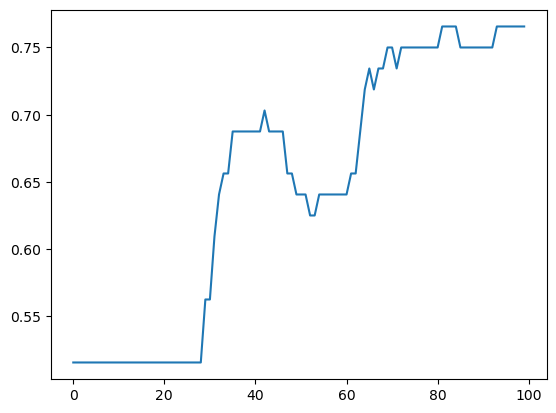

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [19]:
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [20]:
A=X.to_numpy()

In [21]:
b=y.to_numpy()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


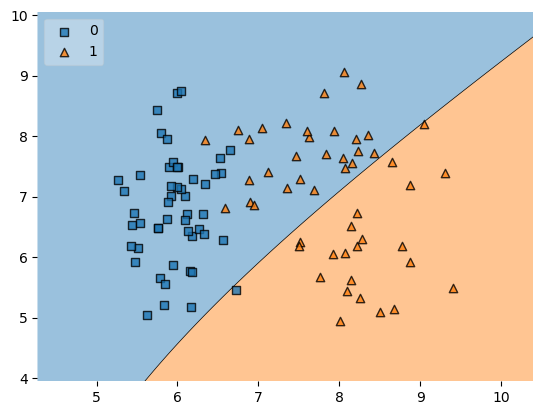

In [22]:
plot_decision_regions(A, b.astype('int'), clf=model, legend=2)

plt.show()

In [23]:
model1 = Sequential()

model1.add(Dense(11,activation='sigmoid',input_dim=2))
model1.add(Dense(11,activation='sigmoid'))
model1.add(Dense(11,activation='sigmoid'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.5037 - loss: 0.6949 - val_accuracy: 0.3750 - val_loss: 0.7032
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5037 - loss: 0.6944 - val_accuracy: 0.3750 - val_loss: 0.7048
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5171 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.7064
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.4904 - loss: 0.6960 - val_accuracy: 0.3750 - val_loss: 0.7074
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5171 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.7088
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5304 - loss: 0.6923 - val_accuracy: 0.3750 - val_loss: 0.7096
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5304 - loss: 0.6921 - val_accuracy: 0.3750 - val_loss: 0.7094
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5037 - loss: 0.6951 - val_accuracy: 0.3750 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


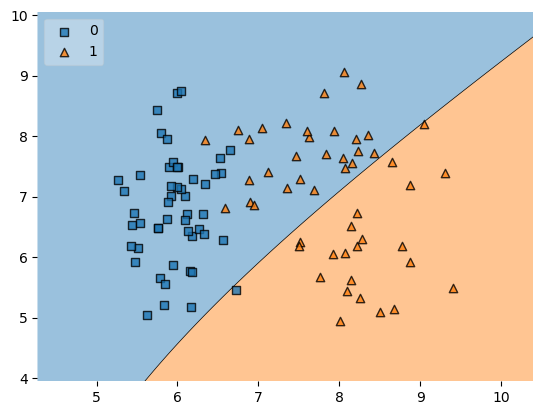

In [24]:
plot_decision_regions(A, b.astype('int'), clf=model, legend=2)

plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


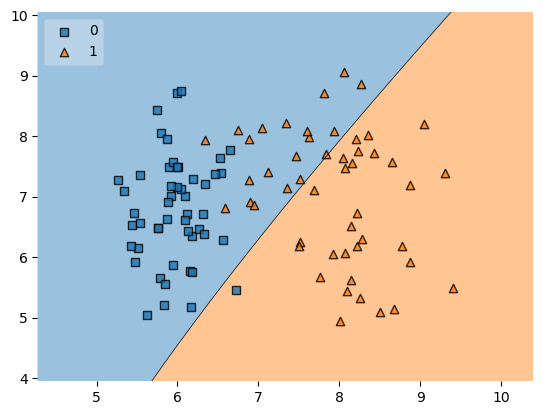

In [25]:
plot_decision_regions(A, b.astype('int'), clf=model1, legend=2)

plt.show()

### Observation
- data should have a clear decision boundary, but it failedddd...

In [26]:
## diff data into models


In [27]:
d2=pd.read_csv('babies.csv')

In [28]:

d2
d2=d2.drop(columns=['case'])

In [29]:



d2=d2.drop(columns= ['gestation'])

In [34]:
d2

,bwt,parity,age,height,weight,smoke
0,120,0,27.0,62.0,100.0,0.0
1,113,0,33.0,64.0,135.0,0.0
2,128,0,28.0,64.0,115.0,1.0
3,123,0,36.0,69.0,190.0,0.0
4,108,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...
1231,113,1,27.0,60.0,100.0,0.0
1232,128,0,24.0,67.0,120.0,0.0
1233,130,0,30.0,65.0,150.0,1.0
1234,125,1,21.0,65.0,110.0,0.0


In [35]:
X=d2.drop(columns=['smoke'])
y=d2['smoke']

In [33]:
X

,bwt,parity,age,height,weight
0,120,0,27.0,62.0,100.0
1,113,0,33.0,64.0,135.0
2,128,0,28.0,64.0,115.0
3,123,0,36.0,69.0,190.0
4,108,0,23.0,67.0,125.0
...,...,...,...,...,...
1231,113,1,27.0,60.0,100.0
1232,128,0,24.0,67.0,120.0
1233,130,0,30.0,65.0,150.0
1234,125,1,21.0,65.0,110.0


In [36]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1231    0.0
1232    0.0
1233    1.0
1234    0.0
1235    0.0
Name: smoke, Length: 1236, dtype: float64

In [45]:



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model3 = Sequential()

model3.add(Dense(10,activation='sigmoid',input_dim=5))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(1,activation='sigmoid'))
adam = Adam(learning_rate=0.04)
model3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model3.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100


C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5194 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5777 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5923 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5919 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5479 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5932 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5671 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5776 - loss: nan - val_accuracy: 0.6414 - val_loss: nan
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [41]:
A=X.to_numpy()
b=y.to_numpy()


## Results:
- model gave bad results...